In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#BOW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

%matplotlib inline

In [27]:
df = pd.read_csv('train.csv')

In [28]:
df.shape

(404290, 6)

In [29]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [30]:
df[df.is_duplicate==1].head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [38]:
train_df = df.head(1000)

In [39]:
train_df.is_duplicate.value_counts()

0    620
1    380
Name: is_duplicate, dtype: int64

In [40]:
train_df.question1[0]

'What is the step by step guide to invest in share market in india?'

In [23]:
ps = PorterStemmer()
def preprocess_qns(input_qns):
    input_qns = re.sub('[^a-zA-Z]'," ",input_qns)
    input_qns = input_qns.lower()
    input_qns=[ps.stem(word) for word in input_qns.split() if word not in set(stopwords.words('english'))]
    return " ".join(input_qns)

In [41]:
preprocess_qns(train_df.question1[0])

u'step step guid invest share market india'

In [42]:
train_df['q1_rev'] = train_df.question1.apply(preprocess_qns)
train_df['q2_rev'] = train_df.question2.apply(preprocess_qns)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_rev,q2_rev
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guid invest share market india,step step guid invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,increas speed internet connect use vpn,internet speed increas hack dn
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mental lone solv,find remaind math math divid
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolv water quikli sugar salt methan car...,fish would surviv salt water


In [45]:
corpus = pd.concat([train_df.q1_rev,train_df.q2_rev])

In [46]:
corpus.head()

0             step step guid invest share market india
1                      stori kohinoor koh noor diamond
2               increas speed internet connect use vpn
3                                     mental lone solv
4    one dissolv water quikli sugar salt methan car...
dtype: object

In [47]:
corpus.shape

(2000,)

In [48]:
cvec = CountVectorizer().fit(corpus)

In [51]:
cvec.get_feature_names()[0:5]

[u'aap', u'abc', u'abid', u'abil', u'abl']

In [54]:
train_df.q1_rev[0]

u'step step guid invest share market india'

In [100]:
def cosine_simi(input_qns):
    q1, q2 = input_qns
    a=cvec.transform([q1])
    b=cvec.transform([q2])
    return round(cosine_similarity(a,b).ravel()[0],2)
    

In [101]:
cosine_simi([train_df.q1_rev[0],train_df.q2_rev[0]])

0.94

In [102]:
train_df['cos_simi_val']=train_df[['q1_rev','q2_rev']].apply(cosine_simi,axis=1)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [103]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_rev,q2_rev,cos_simi_val
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guid invest share market india,step step guid invest share market,0.94
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,0.57
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,increas speed internet connect use vpn,internet speed increas hack dn,0.55
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mental lone solv,find remaind math math divid,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0.28


In [106]:
train_df[train_df.cos_simi_val>=0.7].head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_rev,q2_rev,cos_simi_val
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guid invest share market india,step step guid invest share market,0.94
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,use instead,use instead,1.00
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1,make physic easi learn,make physic easi learn,1.00
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1,first sexual experi like,first sexual experi,0.87
14,14,29,30,What are the laws to change your status from a...,What are the laws to change your status from a...,0,law chang statu student visa green card us com...,law chang statu student visa green card us com...,0.93


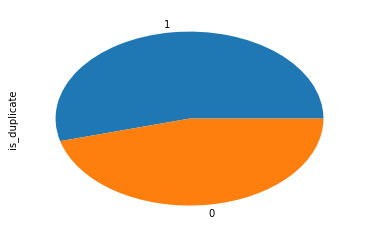

In [108]:
train_df[train_df.cos_simi_val>=0.7]['is_duplicate'].value_counts().plot(kind='pie')

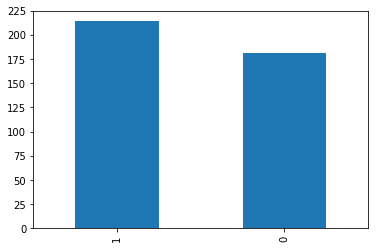

In [109]:
train_df[train_df.cos_simi_val>=0.7]['is_duplicate'].value_counts().plot(kind='bar')

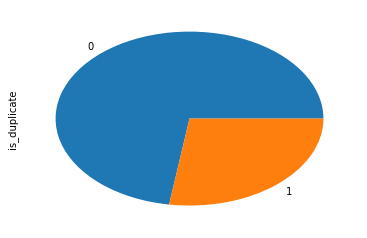

In [110]:
train_df[train_df.cos_simi_val<0.7]['is_duplicate'].value_counts().plot(kind='pie')

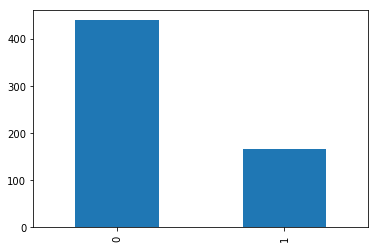

In [111]:
train_df[train_df.cos_simi_val<0.7]['is_duplicate'].value_counts().plot(kind='bar')

In [112]:
org_corpus = pd.concat([train_df.question1,train_df.question2])

In [113]:
cvec1 = CountVectorizer().fit(org_corpus)

In [114]:
def cosine_simi_org(input_qns):
    q1, q2 = input_qns
    a=cvec1.transform([q1])
    b=cvec1.transform([q2])
    return round(cosine_similarity(a,b).ravel()[0],2)

In [115]:
train_df['cos_simi_val_org'] = train_df[['question1','question2']].apply(cosine_simi_org,axis=1)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [116]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_rev,q2_rev,cos_simi_val,cos_simi_val_org
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guid invest share market india,step step guid invest share market,0.94,0.94
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,0.57,0.58
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,increas speed internet connect use vpn,internet speed increas hack dn,0.55,0.37
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mental lone solv,find remaind math math divid,0.00,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0.28,0.42


In [117]:
train_df[train_df.cos_simi_val_org>=0.65].head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_rev,q2_rev,cos_simi_val,cos_simi_val_org
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guid invest share market india,step step guid invest share market,0.94,0.94
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,use instead,use instead,1.00,0.93
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1,make physic easi learn,make physic easi learn,1.00,0.80
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1,first sexual experi like,first sexual experi,0.87,0.93
14,14,29,30,What are the laws to change your status from a...,What are the laws to change your status from a...,0,law chang statu student visa green card us com...,law chang statu student visa green card us com...,0.93,0.98


In [118]:
def gen_op(in_input):
    if in_input>0.65:
        return 1
    else:
        return 0

In [119]:
train_df['rev_op'] = train_df.cos_simi_val.apply(gen_op)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [120]:
train_df['rev_op_org'] = train_df.cos_simi_val_org.apply(gen_op)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [121]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_rev,q2_rev,cos_simi_val,cos_simi_val_org,rev_op,rev_op_org
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guid invest share market india,step step guid invest share market,0.94,0.94,1,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,0.57,0.58,0,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,increas speed internet connect use vpn,internet speed increas hack dn,0.55,0.37,0,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mental lone solv,find remaind math math divid,0.00,0.00,0,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0.28,0.42,0,0


In [127]:
y_test = train_df.iloc[:,5]
y_pred_rev = train_df.iloc[:,10]
y_pred_org = train_df.iloc[:,11]

In [128]:
print "Accuracy Score with PreProcessed Data :", accuracy_score(y_test,y_pred_rev)
print "Accuracy Score with Original Data :", accuracy_score(y_test,y_pred_org)

Accuracy Score with PreProcessed Data : 0.656
Accuracy Score with Original Data : 0.647


In [130]:
# preprocessed data
cm = confusion_matrix(y_test,y_pred_rev)
cm

array([[398, 222],
       [122, 258]])

In [131]:
# Original data
cm = confusion_matrix(y_test,y_pred_org)
cm

array([[476, 144],
       [209, 171]])

In [133]:
# preprocessed data
print classification_report(y_test,y_pred_rev)

             precision    recall  f1-score   support

          0       0.77      0.64      0.70       620
          1       0.54      0.68      0.60       380

avg / total       0.68      0.66      0.66      1000



In [134]:
# Original data

print classification_report(y_test,y_pred_org)

             precision    recall  f1-score   support

          0       0.69      0.77      0.73       620
          1       0.54      0.45      0.49       380

avg / total       0.64      0.65      0.64      1000

